# ACTIVIDAD FINAL

Integrantes:
Luz Angela Rojas Prieto
William Ávila Corchuelo
Eliana Poveda Madrid

## 1. Importar librerías de Pandas 

In [ ]:
#Las librerias son modulos de python que contienen funciones y objetos que pueden ser utilizados para realizar tareas específicas. En este caso, las librerias matplotlib, seaborn y plotly son librerias de visualización de datos. Cada vez que se inicializa el entorno de ejecución, es necesario volver a cargar todas las librerias que se van a utilizar en el notebook.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Cargar bases de datos

Datos del consumo de alcohol de estudiantes de los cursos: **Math** y **Portuguese language**


In [ ]:
df1 = pd.read_csv('student-mat.csv')
df1.shape

(395, 33)

In [ ]:
df2 = pd.read_csv('student-por.csv')
df2.shape

(649, 33)

### 2.1 Agregar columna para identificar cursos

In [ ]:
#Agregar una columna con valor constante para cada df antes de unificar
df1['course'] = 'MAT'
df1.shape

(395, 34)

In [ ]:
#Agregar una columna con valor constante para cada df antes de unificar
df2['course'] = 'POR'
df2.shape

(649, 34)

### 2.2 Concatenar DataFrame df1 y DataFrame df2

Concatenar los Dataframes a lo largo del eje vertical (filas), manteniendo el índice original.

In [ ]:
df3 = pd.concat([df1,df2],axis=0,ignore_index=False)
df3.sample(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
511,MS,F,17,U,GT3,A,1,0,other,other,...,4,5,1,1,4,1,11,9,10,POR
54,GP,F,15,U,LE3,A,3,3,other,other,...,3,4,4,4,1,6,10,13,13,MAT
471,MS,F,16,R,GT3,T,2,2,at_home,other,...,4,4,2,3,5,2,12,11,12,POR


## 3. Determinar el tipo de variables

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

## 4. Limpieza datos

### 4.1 Eliminar datos nulos

In [ ]:
#Mostrar valores nulos por cada columna
display(df3.isnull().sum().head())


school     0
sex        0
age        0
address    0
famsize    0
dtype: int64

### 4.2 Eliminar valores duplicados

In [ ]:
#crear una variable para identificar las filas duplicadas en el Dataframe
duplicated_rows = df3[df3.duplicated(keep=False)]

In [ ]:
#eliminar las filas duplicadas considerando todas las columnas
common_elements = duplicated_rows.drop_duplicates()

In [ ]:
num_common_elements = common_elements.shape[0]
print(f"Number of common elements: {num_common_elements}")

Number of common elements: 0


In [ ]:
# Mantener solo la última aparición de los duplicados
df3.drop_duplicates(inplace=True)
df3.shape


(1044, 34)

### 4.3 Limpieza Texto

In [ ]:
#Definir una función para limpiar variables tipo texto
def limpieza_str (df3: pd.DataFrame, column_name:object):
    df3[column_name]= df3[column_name].str.strip() #espacios al inicio y final
    df3[column_name] =df3[column_name].str.upper() #mayúsculas
    df3[column_name]= df3[column_name].replace("  ","") #espacios dobles
    df3[column_name]= df3[column_name].replace(" ","") #espacios sencillo
    df3[column_name]= df3[column_name].replace('[^\\w\\d\\s\\.]','',regex=True)
    df3[column_name]= df3[column_name].str.replace('Á', 'A') ## limpieza de las tildes 
    df3[column_name]= df3[column_name].str.replace('É', 'E')
    df3[column_name]= df3[column_name].str.replace('Í', 'I')
    df3[column_name]= df3[column_name].str.replace('Ó', 'O')
    df3[column_name]= df3[column_name].str.replace('Ú', 'U')
    return df3


In [ ]:
#Identificar las columnas tipo texto df3
columnas_str = df3.select_dtypes(include=['object']).columns.tolist()
print(columnas_str)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'course']


In [ ]:
limpieza_str (df3,'school')
limpieza_str (df3,'sex')
limpieza_str (df3,'address')
limpieza_str (df3,'famsize')
limpieza_str (df3,'Pstatus')
limpieza_str (df3,'Mjob')
limpieza_str (df3,'Fjob')
limpieza_str (df3,'reason')
limpieza_str (df3,'guardian')
limpieza_str (df3,'schoolsup')
limpieza_str (df3,'famsup')
limpieza_str (df3,'paid')
limpieza_str (df3,'activities')
limpieza_str (df3,'nursery')
limpieza_str (df3,'higher')
limpieza_str (df3,'internet')
limpieza_str (df3,'romantic')
limpieza_str (df3,'course')
df3.sample(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
358,MS,M,18,U,LE3,T,1,1,OTHER,SERVICES,...,3,2,1,2,3,4,10,10,10,MAT
139,GP,F,15,U,GT3,T,4,4,SERVICES,AT_HOME,...,3,3,1,1,5,4,13,14,15,POR


### 4.4 Limpieza Númerica

In [ ]:
#Aplicar una función para limpieza de las variables númericas aplicando replace ()
def limpieza_numerica (df3: pd.DataFrame, column_name:int):
    df3[column_name] = df3[column_name].replace("  ","")
    df3[column_name] = df3[column_name].replace('[^\\d\\.]','',regex=True)
    return df3

In [ ]:
#Identificar las columnas tipo int
columnas_int = df3.select_dtypes(include=['int']).columns.tolist()
print(columnas_int)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [ ]:
limpieza_numerica (df3,'age')
limpieza_numerica (df3,'Medu')
limpieza_numerica (df3,'Fedu')
limpieza_numerica (df3,'traveltime')
limpieza_numerica (df3,'studytime')
limpieza_numerica (df3,'failures')
limpieza_numerica (df3,'famrel')
limpieza_numerica (df3,'freetime')
limpieza_numerica (df3,'goout')
limpieza_numerica (df3,'Dalc')
limpieza_numerica (df3,'Walc')
limpieza_numerica (df3,'health')
limpieza_numerica (df3,'absences')
limpieza_numerica (df3,'G1')
limpieza_numerica (df3,'G2')
limpieza_numerica (df3,'G3')
df3.sample()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
134,GP,M,15,R,GT3,T,3,4,AT_HOME,TEACHER,...,3,3,1,1,5,0,9,0,0,MAT


## 5. Exploración de datos
Explorar los datos para entender su estructura y contenido

### 5.1 Explorar una muestra de los datos usando ILOC

In [ ]:
#Observar las filas de la 60 a la 70 del DataFrame df3
df3.iloc[60:70]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
60,GP,F,16,R,GT3,T,4,4,HEALTH,TEACHER,...,4,4,2,3,4,6,10,11,11,MAT
61,GP,F,16,U,GT3,T,1,1,SERVICES,SERVICES,...,5,5,5,5,5,6,10,8,11,MAT
62,GP,F,16,U,LE3,T,1,2,OTHER,SERVICES,...,4,3,1,1,1,4,8,10,9,MAT
63,GP,F,16,U,GT3,T,4,3,TEACHER,HEALTH,...,4,4,2,4,4,2,10,9,9,MAT
64,GP,F,15,U,LE3,T,4,3,SERVICES,SERVICES,...,4,4,2,4,2,0,10,10,10,MAT
65,GP,F,16,U,LE3,T,4,3,TEACHER,SERVICES,...,4,3,1,2,1,2,16,15,15,MAT
66,GP,M,15,U,GT3,A,4,4,OTHER,SERVICES,...,3,3,5,5,3,4,13,13,12,MAT
67,GP,F,16,U,GT3,T,3,1,SERVICES,OTHER,...,3,3,1,2,5,4,7,7,6,MAT
68,GP,F,15,R,LE3,T,2,2,HEALTH,SERVICES,...,1,3,1,3,4,2,8,9,8,MAT
69,GP,F,15,R,LE3,T,3,1,OTHER,OTHER,...,4,2,2,3,3,12,16,16,16,MAT


### 5.2 Descripción de las columnas relevantes


Con el método describe() se obtienen estadísticas de tendencia central tales como:
**Mean**: Valor promedio de los datos, suma de los valores de un conjunto de datos divido en el número total de valores
**Std**: Mide la cantidad de dispersión de los datos. Es la raíz cuadrada de la varianza (promedio de la diferencia al cuadrado entre cada valor)

In [ ]:
columns_int= ['age','Dalc','Walc','health','absences']
df3[columns_int].describe()


,age,Dalc,Walc,health,absences
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.494253,2.284483,3.543103,4.434866
std,1.239975,0.911714,1.285105,1.424703,6.210017
min,15.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,5.000000,5.000000,5.000000,75.000000


### 5.3 Identificar correlación entre las variables

Exploraremos las correlaciones entre diferentes variables númericas en nuestro DataFrame

In [ ]:
df3[columnas_int].corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
Medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
Fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
Dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


Existe una correlación entre los estudiantes que salen con amigos, tienen tiempo libre y consumen de alcohol los fines de semana

### 5.4 Filtros

In [ ]:
#Estudiantes de matemáticas que tienen un consumo diaro alto de alcohol
df3_math_dalc = df3[(df3['course']=='MAT') & (df3['Dalc']==5)]
df3_math_dalc.shape


(9, 34)

In [ ]:
#Estudiantes de portugués que tienen un consumo diaro alto de alcohol
df3_por_dalc = df3[(df3['course']=='POR') & (df3['Dalc']==5)]
df3_por_dalc.shape

(17, 34)

In [ ]:
#Estudiantes que tienen ausencias mayores a la media 4.4 y un consumo alto de alcohol los fines de semana
df3_absences_walc = df3.query('absences>5 and Walc==5')
df3_absences_walc.shape

(36, 34)

In [ ]:
#Categorías de ocupación madre
print("Categorías únicas de la columna 'Mjob':")
print(df3['Mjob'].unique())

Categorías únicas de la columna 'Mjob':
['AT_HOME' 'HEALTH' 'OTHER' 'SERVICES' 'TEACHER']


In [ ]:
# Contar frecuencias en la columna tiempo de viaje de casa a escuela, 
# La mayoría de estudiantes toman menos de 15 minutos en llegar a la escuela, viven cerca.
print("Frecuencia de categorías en la columna 'traveltime':")
print(df3['traveltime'].value_counts())

Frecuencia de categorías en la columna 'traveltime':
traveltime
1    623
2    320
3     77
4     24
Name: count, dtype: int64


## 6. Graficación de variables
### Caracterización socio-demográfica
En la primera parte hacemos un análisis de índole esencialmente descriptivo con el propósito de aproximarnos al conocimiento y comprensión del tamaño, estructura y características de los estudiantes objeto de análisis.

### Gráfica I:  Distribución por School

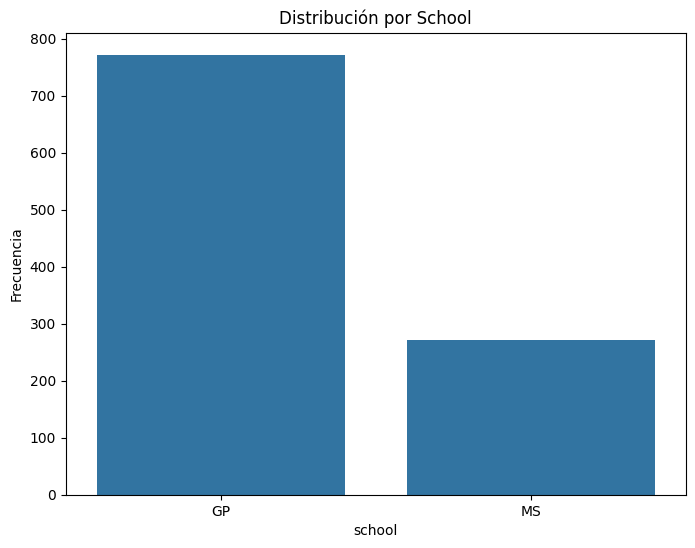

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='school', data=df3)
plt.title('Distribución por School')
plt.xlabel('school')
plt.ylabel('Frecuencia')
plt.show()

Muestra la distribución de los estudiantes entre los colegios GP- Gabriel Pereira y MS- Mousinho da Silveira.

### Gráfica II : Distribución de estudiantes por escuela y curso

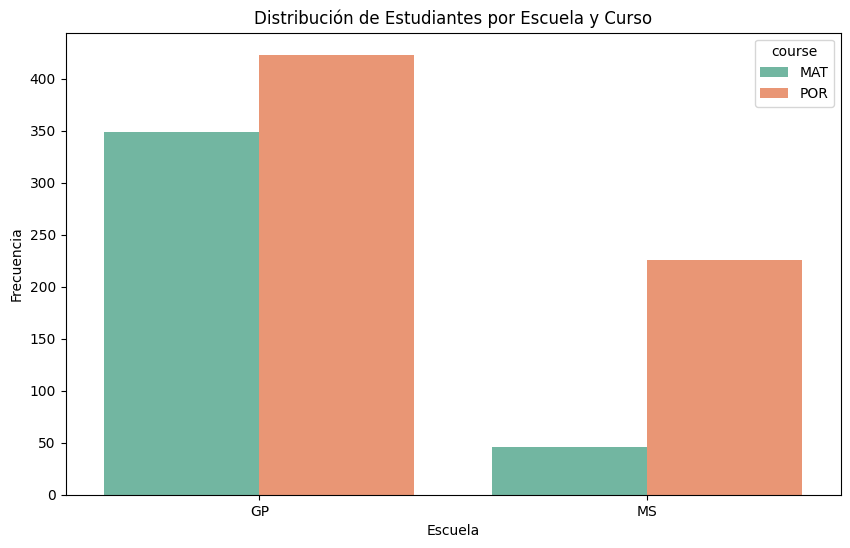

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='school', hue='course', palette='Set2')
plt.title('Distribución de Estudiantes por Escuela y Curso')
plt.xlabel('Escuela')
plt.ylabel('Frecuencia')
plt.legend(title='course')
plt.show()

Muestra la distribución de los estudiantes de las clases de Matemáticas y Portugués en cada escuela

### Gráfica III : Distribución de estudiantes en escuela GP por nivel de consumo diario de alcohol

/tmp/ipykernel_105/4202364918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3[df3['school']=='MS'], x='Dalc', palette='Set2')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


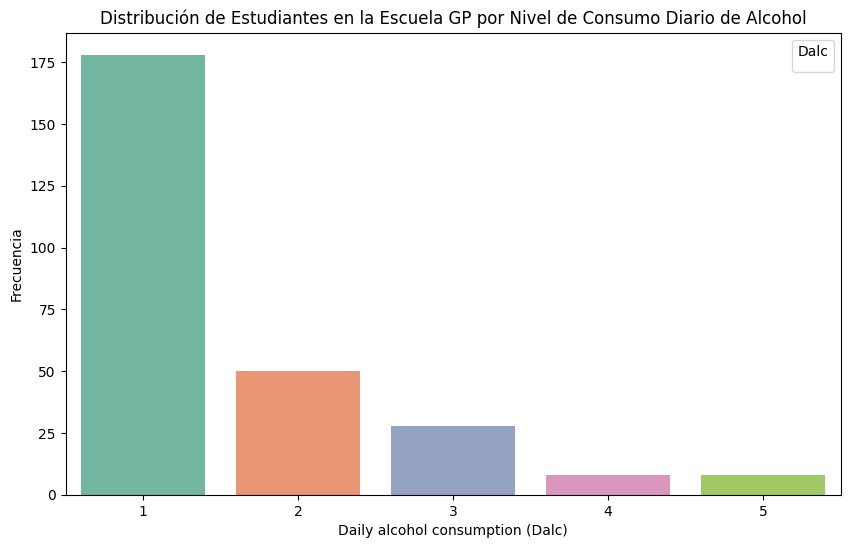

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df3[df3['school']=='MS'], x='Dalc', palette='Set2')
plt.title('Distribución de Estudiantes en la Escuela GP por Nivel de Consumo Diario de Alcohol')
plt.xlabel('Daily alcohol consumption (Dalc)')
plt.ylabel('Frecuencia')
plt.legend(title='Dalc')
plt.show()

Muestra que la mayoría de los estudiantes de la escuela "Gabriel Pereira" consumen poco alcohol en los días laborales al considerar que en la escala de 1 a 5, 1 corresponde a un consumo muy bajo y 5 un consumo muy alto.

### Gráfica IV: Proporción de estudiantes por sexo

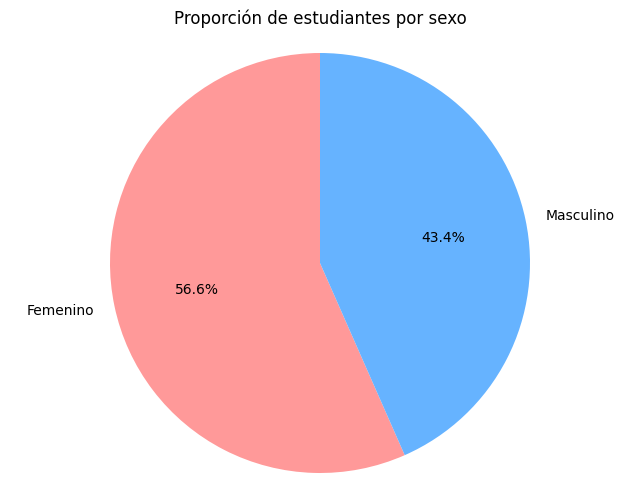

In [ ]:
# Etiquetas para el gráfico (Femenino y Masculino)
labels = ['Femenino', 'Masculino']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Añadir un título
plt.title('Proporción de estudiantes por sexo')

# Asegurar que el gráfico se vea en formato de círculo
plt.axis('equal')

# Mostrar el gráfico
plt.show()

El 56.6% de los estudiantes son mujeres y el 43.4% son hombres

### Gráfico V: Estudiantes por ubicación

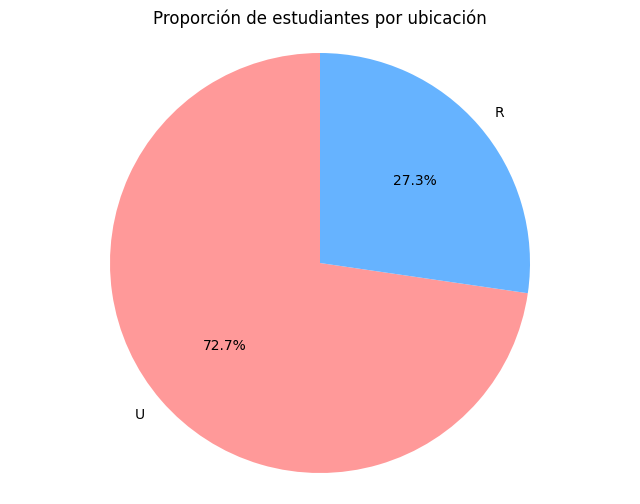

In [ ]:
# Contar cuántos estudiantes hay de acuerdo con la dirección
address_counts = df3['address'].value_counts()

# Etiquetas para el gráfico
labels = ['U', 'R']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(address_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Añadir un título
plt.title('Proporción de estudiantes por ubicación')

# Asegurar que el gráfico se vea en formato de círculo
plt.axis('equal')

# Mostrar el gráfico
plt.show()

El 72,7% de los estudiantes habitan en zonas urbanas y el 27,3% en zonas rurales

### Gráfica VI - Distribución de edades

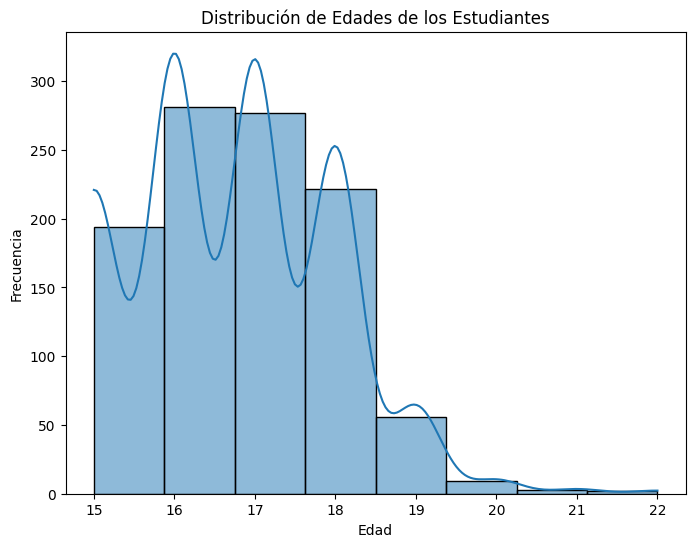

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df3['age'], bins=8, kde=True)
plt.title('Distribución de Edades de los Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Las edades de los estudiantes se concentran entre los 16 y 18 años de edad.

### Gráfica VII: Distribución de calificaciones finales (G3)

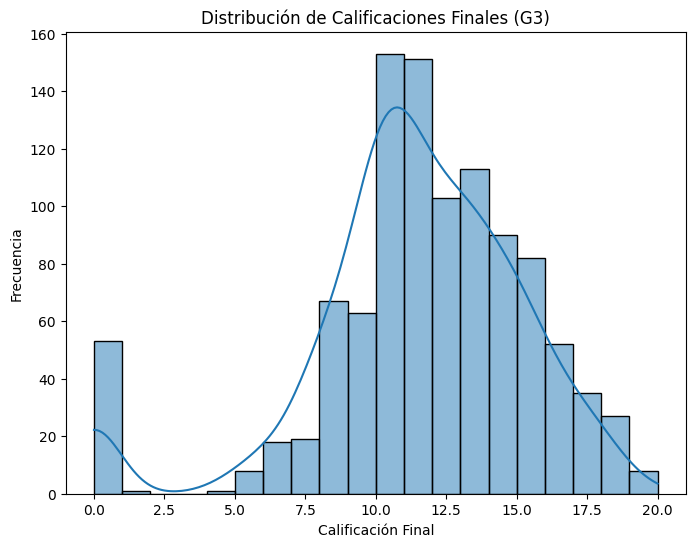

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df3['G3'], bins=20, kde=True)
plt.title('Distribución de Calificaciones Finales (G3)')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.show()

Las calificaciones de los estudiantes encuestados se concentraron entre 7.5 y 15

### Gráfica VIII: Relación entre el tiempo de estudio y la nota final

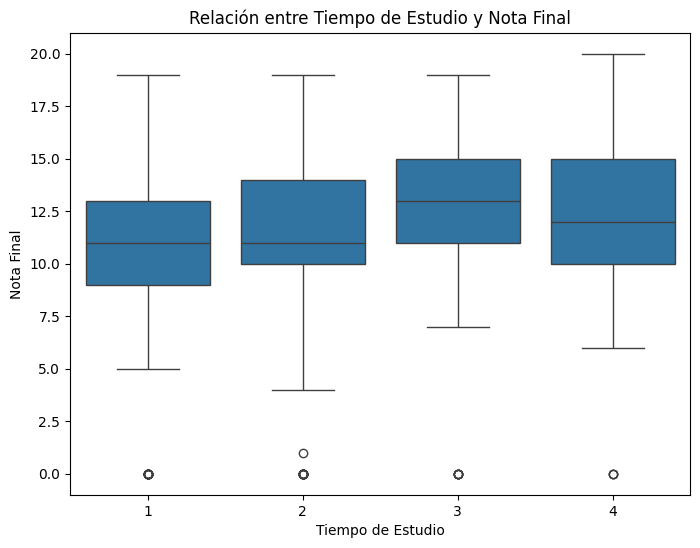

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=df3)
plt.title('Relación entre Tiempo de Estudio y Nota Final')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Nota Final')
plt.show()

En promedio, las notas más altas fueron obtenidas por estudiantes que dedicaron 3 horas de estudio. No todos los estudiantes que dedicaron 4 horas obtuvieron mayores notas comparados con otros estudiantes que estudiaron menos tiempo.

### Gráfica IX: Relación entre el consumo de alcohol los fines de semana y la nota final

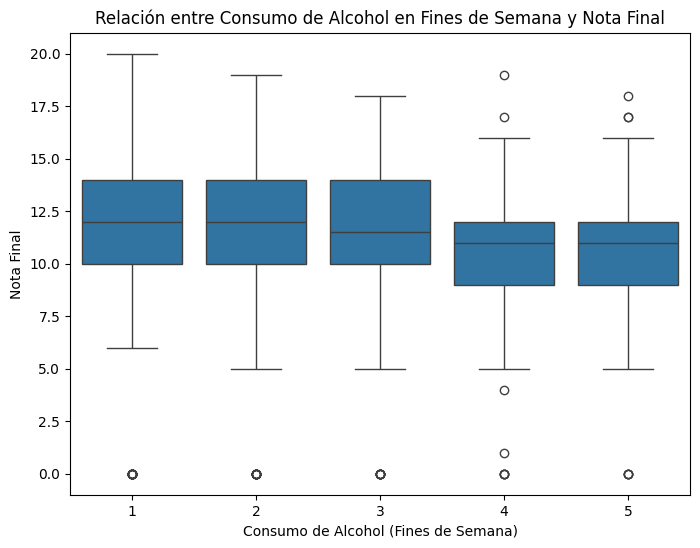

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Walc', y='G3', data=df3)
plt.title('Relación entre Consumo de Alcohol en Fines de Semana y Nota Final')
plt.xlabel('Consumo de Alcohol (Fines de Semana)')
plt.ylabel('Nota Final')
plt.show()

En promedio, los estudiantes que menos consumieron alcohol los fines de semana, son aquellos que obtuvieron mayores calificaciones finales.

### Gráfico X: Dispersión entre ausencias y calificación final

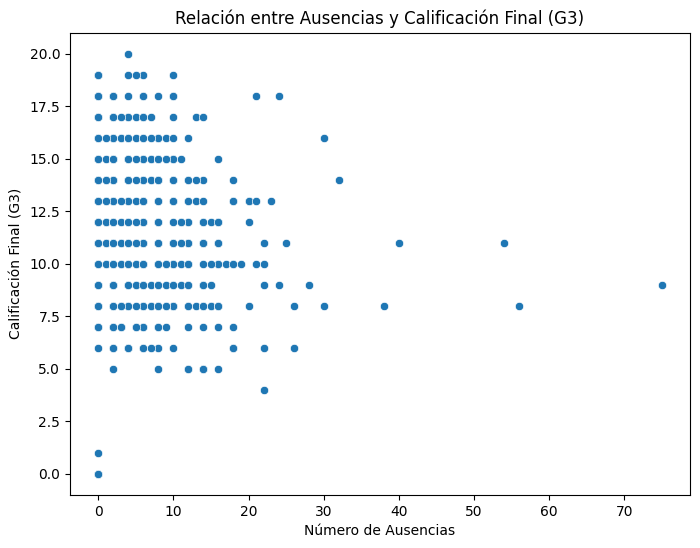

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de dispersión
sns.scatterplot(x='absences', y='G3', data=df3)

# Añadir el título y etiquetas de los ejes
plt.title('Relación entre Ausencias y Calificación Final (G3)')
plt.xlabel('Número de Ausencias')
plt.ylabel('Calificación Final (G3)')

# Mostrar el gráfico
plt.show()

Si bien no existe una relación fuerte entre el número de ausencias y la calificación final, la mayoría de estudiantes que se ausentaron menos de 20 veces tienden a sacar una calificación un poco más alta.

### Gráfico XI: Relación entre ausencias y calificación final (G3)

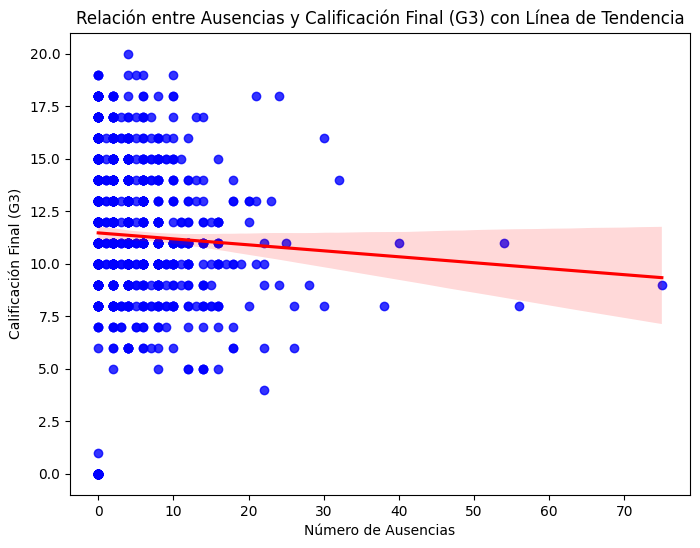

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el gráfico de dispersión con línea de tendencia
sns.regplot(x='absences', y='G3', data=df3, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Añadir el título y etiquetas de los ejes
plt.title('Relación entre Ausencias y Calificación Final (G3) con Línea de Tendencia')
plt.xlabel('Número de Ausencias')
plt.ylabel('Calificación Final (G3)')

# Mostrar el gráfico
plt.show()

Si bien no existe una tendencia clara, a menos cantidad de ausencias se logran mejores calificaciones.

In [ ]:
# Contar cuántos estudiantes hay de cada sexo
sex_counts = df3['sex'].value_counts()



# Mostrar el conteo
print(sex_counts)

sex
F    591
M    453
Name: count, dtype: int64


### Gráfico XII: Correlación entre las variables

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df3.select_dtypes(include=['int64', 'float64'])

# Verificar las columnas seleccionadas
numeric_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df3.select_dtypes(include=['int64', 'float64'])

# Verificar las columnas seleccionadas
numeric_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.130196 -0.138521    0.049216  -0.007870  0.282364   
Medu       -0.130196  1.000000  0.642063   -0.238181   0.090616 -0.187769   
Fedu       -0.138521  0.642063  1.000000   -0.196328   0.033458 -0.191390   
traveltime  0.049216 -0.238181 -0.196328    1.000000  -0.081328  0.087177   
studytime  -0.007870  0.090616  0.033458   -0.081328   1.000000 -0.152024   
failures    0.282364 -0.187769 -0.191390    0.087177  -0.152024  1.000000   
famrel      0.007162  0.015004  0.013066   -0.012578   0.012324 -0.053676   
freetime    0.002645  0.001054  0.002142   -0.007403  -0.094429  0.102679   
goout       0.118510  0.025614  0.030075    0.049740  -0.072941  0.074683   
Dalc        0.133453  0.001515 -0.000165    0.109423  -0.159665  0.116336   
Walc        0.098291 -0.029331  0.019524    0.084292  -0.229073  0.107432   
health     -0.029129 -0.013254  0.034288   -0.029002  -0.063044  0.048311   

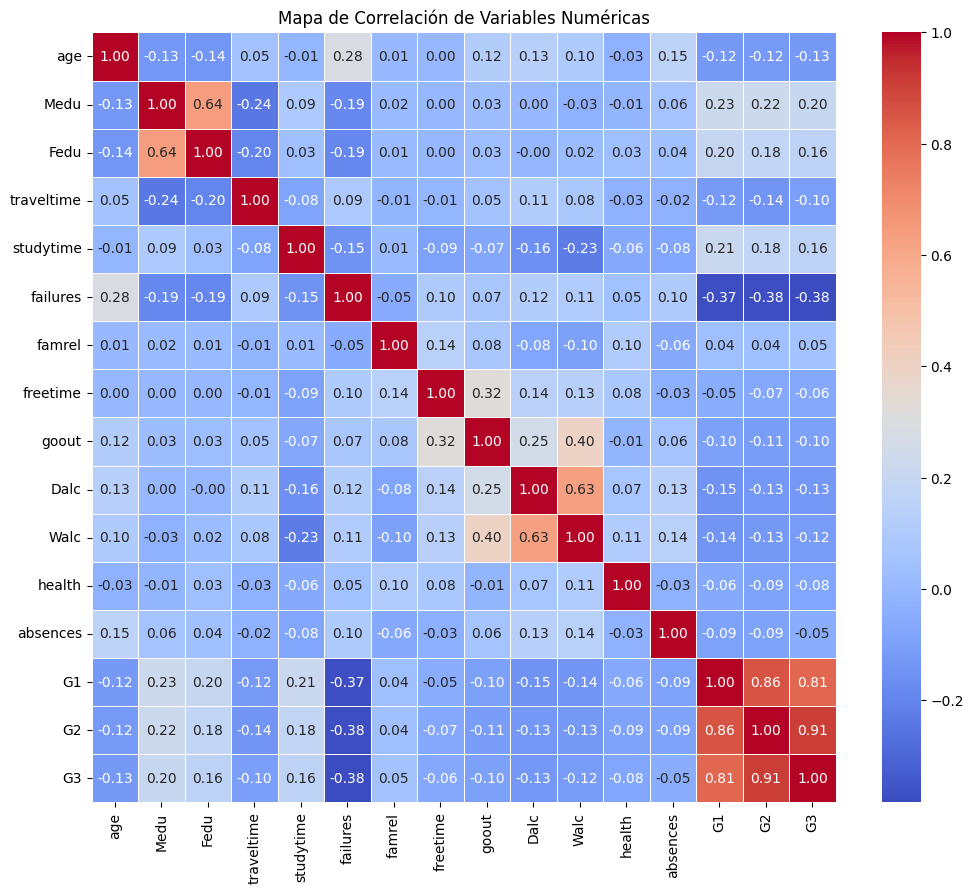

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Añadir el título
plt.title('Mapa de Correlación de Variables Numéricas')

# Mostrar el gráfico
plt.show()

Existe una correlación moderada entre el grado de educación del padre y el grado de educación de la madre lo cual indica que posiblemente ambos hayan alcanzado el mismo nivel educativo en la mayoría de los casos. También existe una correlación similar entre el consumo de alcohol los días laborales y el fin de semana, esto indica que, si una persona consume bastante entre semana, también lo hace el fin de semana. Finalmente, existen grados de correlación más altos entre la nota final y las notas previas; si la nota final fue alta, las dos anteriores posiblemente fueron similares.

## 7. Extraer base de datos en formato cvs


In [ ]:
!pip install openpyxl==3.1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 32.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
df3.to_excel('base_exportada.xlsx',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29388d73-052e-433b-ab71-586b8d3047c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>